In [1]:
import pandas as pd

In [2]:
# !pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 68.3/68.3 kB 464.1 kB/s eta 0:00:00


In [19]:
# import kagglehub


# path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

# print("Path to dataset files:", path)

# The data Set is not downloading in the local directory So i updated the code to download the dataset in the same library

In [3]:
import os
import kagglehub

# Set the directory where you want the dataset to be downloaded
custom_path = r"C:\Users\samma\OneDrive\Documents\VIT Mtech\Sem 2\Labs\Edge Intelligence\Lab 1 - ImageDatasetReshaping"

# Tell KaggleHub to use this directory
os.environ["KAGGLEHUB_CACHE"] = custom_path


# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)


100%|████████████████████████████████████████████████████████████████████████████████| 656M/656M [13:16<00:00, 864kB/s]

Extracting files...


Path to dataset files: C:\Users\samma\OneDrive\Documents\VIT Mtech\Sem 2\Labs\Edge Intelligence\Lab 1 - ImageDatasetReshaping\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5


### Images numbers

In [14]:
import os

# base_folder_path = r"C:\Users\batch1\Desktop\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"

base_folder_path = r"C:\Users\samma\OneDrive\Documents\VIT Mtech\Sem 2\Labs\Edge Intelligence\Lab 1 - ImageDatasetReshaping\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"
# Define common image extensions (add more if necessary)
IMAGE_EXTENSIONS = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')

count = 0

if not os.path.isdir(base_folder_path):
    print(f"Error: The folder '{base_folder_path}' was not found.")
else:
    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(base_folder_path):
        for filename in files:
            # Check if the file ends with a known image extension (case-insensitive)
            if filename.lower().endswith(IMAGE_EXTENSIONS):
                count += 1

    print(f"Total number of images found in the directory structure: {count}")



Total number of images found in the directory structure: 5400


### Checking for Different shapes of images are present or not

In [17]:
import os
from PIL import Image

# Define the exact base folder path
base_folder_path = r"C:\Users\samma\OneDrive\Documents\VIT Mtech\Sem 2\Labs\Edge Intelligence\Lab 1 - ImageDatasetReshaping\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"

# Check if the folder exists
if not os.path.isdir(base_folder_path):
    print(f"Error: The folder '{base_folder_path}' was not found.")
else:
    print(f"Starting recursive image processing in: '{base_folder_path}'\n")
    
    for root, dirs, files in os.walk(base_folder_path):
        for filename in files:
            # Construct the full file path
            file_path = os.path.join(root, filename)

            # Check if the file is an image (by attempting to open it)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    relative_path = os.path.relpath(file_path, base_folder_path)
                    print(f"File: '{relative_path}', Shape: ({height}, {width})")
            except IOError:

                pass
            except Exception as e:
                # Handle other potential errors
                print(f"An error occurred with file '{file_path}': {e}")
    print("\nProcessing complete.")

Starting recursive image processing in: 'C:\Users\samma\OneDrive\Documents\VIT Mtech\Sem 2\Labs\Edge Intelligence\Lab 1 - ImageDatasetReshaping\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals'

File: 'antelope\02f4b3be2d.jpg', Shape: (1025, 1640)
File: 'antelope\03d7fc0888.jpg', Shape: (228, 300)
File: 'antelope\058fa9a60f.jpg', Shape: (223, 226)
File: 'antelope\0a37838e99.jpg', Shape: (630, 1200)
File: 'antelope\0b1a3af197.jpg', Shape: (600, 900)
File: 'antelope\0b688923b0.jpg', Shape: (480, 640)
File: 'antelope\0c16ef86c0.jpg', Shape: (250, 201)
File: 'antelope\0e17715606.jpg', Shape: (183, 275)
File: 'antelope\0ee903ea13.jpg', Shape: (800, 800)
File: 'antelope\0fb2e9aa81.jpg', Shape: (807, 640)
File: 'antelope\0fe7076f06.jpg', Shape: (667, 1000)
File: 'antelope\17a07512e9.jpg', Shape: (426, 640)
File: 'antelope\17ddf07f85.jpg', Shape: (199, 254)
File: 'antelope\1a3f59ee02.jpg', Shape: (183, 275)
File: 'antelope\1b0b0b614b.jpg', Shape: 

### There are different shapes in the folders so we are reshaping it

In [18]:
import os
from PIL import Image

base_folder_path = r"C:\Users\samma\OneDrive\Documents\VIT Mtech\Sem 2\Labs\Edge Intelligence\Lab 1 - ImageDatasetReshaping\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"
output_folder_path = r"C:\Users\samma\OneDrive\Documents\VIT Mtech\Sem 2\Labs\Edge Intelligence\Lab 1 - ImageDatasetReshaping\datasets\iamsouravbanerjee\resized_animals"
TARGET_SIZE = (150, 150) 
os.makedirs(output_folder_path, exist_ok=True)

for root, dirs, files in os.walk(base_folder_path):
    for filename in files:
        file_path = os.path.join(root, filename)
        try:
            with Image.open(file_path) as img:
                # Resize the image to the exact target size
                resized_img = img.resize(TARGET_SIZE, Image.LANCZOS)
                
                # Define save path in the new folder, keeping original subfolder structure
                relative_path = os.path.relpath(file_path, base_folder_path)
                save_path = os.path.join(output_folder_path, relative_path)
                
                # Ensure the destination subdirectory exists
                os.makedirs(os.path.dirname(save_path), exist_ok=True)
                
                # Save the new image
                resized_img.save(save_path)
                print(f"Resized '{filename}' to {TARGET_SIZE} and saved.")
        except IOError:
            print(f"Skipping non-image file: '{filename}'")
        except Exception as e:
            print(f"An error occurred with file '{filename}': {e}")

Resized '02f4b3be2d.jpg' to (150, 150) and saved.
Resized '03d7fc0888.jpg' to (150, 150) and saved.
Resized '058fa9a60f.jpg' to (150, 150) and saved.
Resized '0a37838e99.jpg' to (150, 150) and saved.
Resized '0b1a3af197.jpg' to (150, 150) and saved.
Resized '0b688923b0.jpg' to (150, 150) and saved.
Resized '0c16ef86c0.jpg' to (150, 150) and saved.
Resized '0e17715606.jpg' to (150, 150) and saved.
Resized '0ee903ea13.jpg' to (150, 150) and saved.
Resized '0fb2e9aa81.jpg' to (150, 150) and saved.
Resized '0fe7076f06.jpg' to (150, 150) and saved.
Resized '17a07512e9.jpg' to (150, 150) and saved.
Resized '17ddf07f85.jpg' to (150, 150) and saved.
Resized '1a3f59ee02.jpg' to (150, 150) and saved.
Resized '1b0b0b614b.jpg' to (150, 150) and saved.
Resized '1d3c6105c9.jpg' to (150, 150) and saved.
Resized '1d556456dc.jpg' to (150, 150) and saved.
Resized '1db1ad56e5.jpg' to (150, 150) and saved.
Resized '24b29ea96e.jpg' to (150, 150) and saved.
Resized '26ffc1ee1f.jpg' to (150, 150) and saved.


In [9]:
!pip install matplotlib pillow

Defaulting to user installation because normal site-packages is not writeable


Opening images from: 'C:\Users\batch1\Desktop\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals'


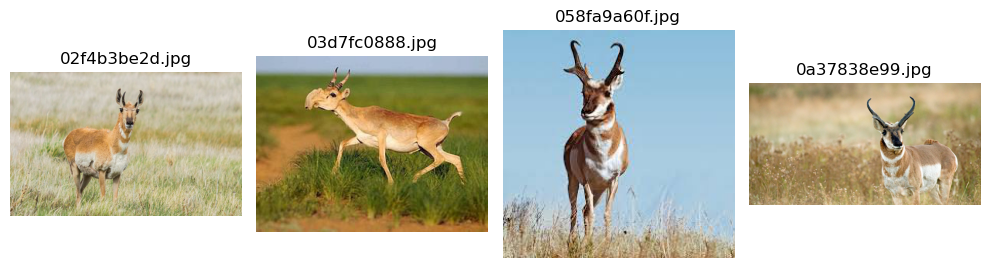

Finished displaying selected images.


In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image

base_folder_path = r"C:\Users\batch1\Desktop\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"

# Set up the plotting environment to show the first 4 images found
fig = plt.figure(figsize=(10, 10))
count = 0
max_images_to_show = 4

print(f"Opening images from: '{base_folder_path}'")

for root, dirs, files in os.walk(base_folder_path):
    for filename in files:
        if count >= max_images_to_show:
            break # Stop after we display the max number of images
            
        file_path = os.path.join(root, filename)
        
        try:
            with Image.open(file_path) as img:
                # Add a subplot for the image
                count += 1
                ax = fig.add_subplot(1, max_images_to_show, count)
                
                # Use matplotlib to display the image
                ax.imshow(img)
                ax.axis('off') # Hide axis ticks
                ax.set_title(filename)

        except IOError:
            continue # Skip non-image files
        except Exception as e:
            print(f"Error displaying {filename}: {e}")

    if count >= max_images_to_show:
        break # Stop iterating through folders if we have enough images

# Display all the plots generated in the loop
plt.tight_layout()
plt.show()

print("Finished displaying selected images.")